# ST445 Managing and Visualizing Data
## Dimensionality Reduction

#### Your candidate number
---

## Homework assignment 

The task is to evaluate the relations between computation time and the number of samples for the following dimensionality reduction methods: __PCA__, __MDS__, __Isomap__, __Spectral Embedding__ and __t-SNE__. The input data is the MNIST handwritten digits data we used in class. For each fitting you need to vary the number of input data points and take a random sample of data points from the original data (_random sampling without replacement_). You need to do this for 21 sample sizes that are equividistant in a logarithimic scale (base 10) between the end points 100 to 1000 (1083 is the total number of points in the MNIST dataset) up to rounding to integers. For each sample size and dimensionality reduction method, run 5 repeated computations and then compute and record the mean computation time from these runs. Produce a plot that shows the mean computation time versus the sample size for different dimensionality reduction methods (all in one plot) in log-log scale. Assess and discuss the obtained results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from sklearn import datasets

digits = datasets.load_digits(n_class=6) # only digit 0, 1, 2, 3, 4, 5
X = digits.data
labels = digits.target

n, p = X.shape

print(n, p)

1083 64


In [5]:
from sklearn import decomposition, manifold
from sklearn.utils import resample
import numpy as np
import time

n_repeats = 5
num_samples = 21
sample_sizes = np.logspace(2, 3, num_samples, dtype=int)
sample_sizes = np.round(sample_sizes).astype(int)

pca_computation_times = []
mds_computation_times = []
isomap_computation_times = []
spectral_computation_times = []
tsne_computation_times = []

for sample_size in sample_sizes:
    # PCA
    pca_times = []
    for _ in range(n_repeats):
        X_sample = resample(X, replace=False, n_samples=sample_size)
        t0 = time.time()
        clf_pca = decomposition.TruncatedSVD(n_components=2)
        Y_pca = clf_pca.fit_transform(X_sample - X_sample.mean(axis=0))
        pca_dt = time.time() - t0
        pca_times.append(pca_dt)
    mean_pca_time = np.mean(pca_times)
    pca_computation_times.append(mean_pca_time)

    # MDS
    mds_times = []
    for _ in range(n_repeats):
        X_sample = resample(X, replace=False, n_samples=sample_size)
        t0 = time.time()
        clf_mds = manifold.MDS(n_components=2, n_init=1, max_iter=200, normalized_stress='auto')
        Y_mds = clf_mds.fit_transform(X)
        mds_dt = time.time() - t0
        mds_times.append(mds_dt)
    mean_mds_time = np.mean(mds_times)
    mds_computation_times.append(mean_mds_time)

    # Isomap
    isomap_times = []
    for _ in range(n_repeats):
        X_sample = resample(X, replace=False, n_samples=sample_size)
        t0 = time.time()
        clf = manifold.Isomap(n_neighbors=30, n_components=2, n_jobs=-1)
        Y_isomap = clf.fit_transform(X_sample)
        isomap_dt = time.time() - t0
        isomap_times.append(isomap_dt)
    mean_isomap_time = np.mean(isomap_times)
    isomap_computation_times.append(mean_isomap_time)

    # Spectral Embedding
    spectral_times = []
    for _ in range(n_repeats):
        X_sample = resample(X, replace=False, n_samples=sample_size)
        t0 = time.time()
        clf = manifold.SpectralEmbedding(n_components=2, random_state=0, eigen_solver="arpack",
                                         affinity='nearest_neighbors', n_neighbors=30)
        Y_spectral = clf.fit_transform(X_sample)
        se_dt = time.time() - t0
        spectral_times.append(se_dt)
    mean_spectral_time = np.mean(spectral_times)
    spectral_computation_times.append(mean_spectral_time)

    # t-SNE
    tsne_times = []
    for _ in range(n_repeats):
        X_sample = resample(X, replace=False, n_samples=sample_size)
        t0 = time.time()
        clf = manifold.TSNE(n_components=2, init='pca', random_state=0, n_iter=500, learning_rate='auto')
        Y_tsne = clf.fit_transform(X_sample)
        tsne_dt = time.time() - t0
        tsne_times.append(tsne_dt)
    mean_tsne_time = np.mean(tsne_times)
    tsne_computation_times.append(mean_tsne_time)

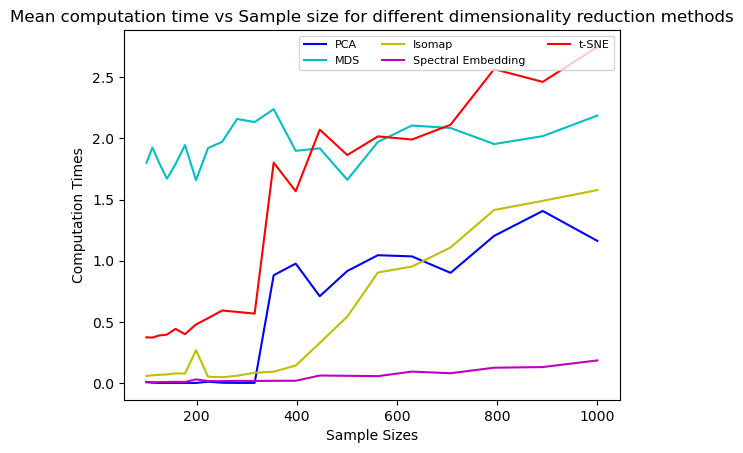

In [11]:
import matplotlib.pyplot as plt
from numpy.random import random

def plot_2d_digits(label, x, y, color):
    return plt.plot(x, y, c=color, label=label)

colors = ['b', 'c', 'y', 'm', 'r']

lo = plot_2d_digits('PCA', sample_sizes, pca_computation_times, color=colors[0]) 
l  = plot_2d_digits('MDS', sample_sizes, mds_computation_times, color=colors[1])
a  = plot_2d_digits('Isomap', sample_sizes, isomap_computation_times , color=colors[2])
h  = plot_2d_digits('Spectral Embedding',sample_sizes, spectral_computation_times, color=colors[3])
hh = plot_2d_digits('t-SNE', sample_sizes, tsne_computation_times, color=colors[4])

plt.legend(loc='upper right', ncol=3, fontsize=8)
plt.xlabel('Sample Sizes')  
plt.ylabel('Computation Times')  
plt.title('Mean computation time vs Sample size for different dimensionality reduction methods')
plt.show()

In [ ]:
#According to commutation times vs. sample size plot, it is seen that t-SNE has higher time complexity
#as the sample size gets larger. On the other hand, Spectral Embedding has lowest computation times around 0.2 
#and has slight increase by size of samples increases. PCA and Isomap nearly experienced similar trends. 
#Lastly, even though MDS takes higher computation times as small sample sizes, as sample size gets larger 
#it has takes less computation times then t-SNE and takes more than all others.